In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
zf_train = zipfile.ZipFile('C:/Users/user/Desktop/DL_Projects/Tag_predictor_FB/Train.zip') 
data = pd.read_csv(zf_train.open('Train.csv'),nrows = 100000)

In [3]:
data.iloc[0]

Id                                                       1
Title    How to check if an uploaded file is an image w...
Body     <p>I'd like to check if an uploaded file is an...
Tags     php image-processing file-upload upload mime-t...
Name: 0, dtype: object

In [4]:
X = data.drop('Tags',axis = 1)
y = data['Tags']

In [6]:
X.tail()

,Id,Title,Body
99995,99996,where to overwrite get_posts methods in single...,<p>we are having a performance issue for it we...
99996,99997,Query data in Powerpoint,<p>I would like to build an MS PowerPoint 2010...
99997,99998,Convolution of function,<p>I need find $x^2\cdot e^{{-x^2}/2} * e^{{-x...
99998,99999,How to output a value stored in a variable in ...,"<p>I am learning assembly programming using ""8..."
99999,100000,strange behaviour with a tableviewcontroller,"<p><img src=""http://sharingdream.com/phone.jpg..."


In [7]:
y.head()

0    php image-processing file-upload upload mime-t...
1                                              firefox
2                            r matlab machine-learning
3                                      c# url encoding
4                            php api file-get-contents
Name: Tags, dtype: object

In [8]:
# Whats the distribution of tags (how many tags per question)

Text(0, 0.5, '# of questions')

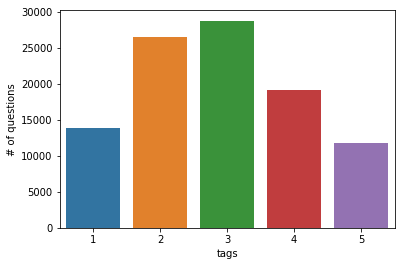

In [9]:
fig = sns.countplot(y.apply(lambda x: len(x.split())))
plt.xlabel('tags')
plt.ylabel('# of questions')

In [7]:
Y = y.apply(lambda x: x.split())

In [8]:
tags = []

for row in Y:
    for tag in row:
        tags.append(tag)

In [9]:
from collections import Counter
tags = dict(Counter(tags))
tags_sorted = sorted(tags.items(), key=lambda x: x[1],reverse=True)
tags_sorted[:5]

[('c#', 7786),
 ('java', 6788),
 ('php', 6575),
 ('javascript', 6135),
 ('android', 5317)]

In [11]:
plt.bar(range(len(tags_sorted[:35])), [val[1] for val in tags_sorted[:35]], align='center')
plt.xticks(range(len(tags_sorted[:35])), [val[0] for val in tags_sorted[:35]])
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(Y),
                   columns=mlb.classes_,
                   index=Y.index)


ModuleNotFoundError: No module named 'sklearn'

In [19]:
X.tail()

,Id,Title,Body
99995,99996,where to overwrite get_posts methods in single...,<p>we are having a performance issue for it we...
99996,99997,Query data in Powerpoint,<p>I would like to build an MS PowerPoint 2010...
99997,99998,Convolution of function,<p>I need find $x^2\cdot e^{{-x^2}/2} * e^{{-x...
99998,99999,How to output a value stored in a variable in ...,"<p>I am learning assembly programming using ""8..."
99999,100000,strange behaviour with a tableviewcontroller,"<p><img src=""http://sharingdream.com/phone.jpg..."


In [20]:
res.tail()

,.a,.bash-profile,.class-file,.each,.emf,.hgtags,.htaccess,.htpasswd,.mov,.net,...,zpt,zsh,zshrc,zune,zune-hd,zurb-foundation,zwoptex,zxing,zywall,zyxel
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


In [106]:
#X['Title'] = X['Title'].str.lower()
#X['Title'] = X['Title'].apply(cleanHtml)
#X['Title'] = X['Title'].apply(cleanPunc)
#X['Title'] = X['Title'].apply(keepAlpha)

In [22]:
X['Body'] = X['Body'].str.lower()
X['Body'] = X['Body'].apply(cleanHtml)
X['Body'] = X['Body'].apply(cleanPunc)
X['Body'] = X['Body'].apply(keepAlpha)

In [23]:
import nltk
#nltk.download('stopwords')

In [24]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [25]:
#X['Title'] = X['Title'].apply(removeStopWords)
X['Body'] = X['Body'].apply(removeStopWords)

In [112]:
#X['Title'][0]

'  check   uploaded file   image without mime type'

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
# Might take awhile...
bow_transformer_title = CountVectorizer(analyzer=lambda x: x.split()).fit(X['Title'])

# Print total number of vocab words
print(len(bow_transformer_title.vocabulary_))

44487


In [116]:
bow4 = bow_transformer_title.transform([X['Title'][1]])
print(bow4)
print(bow4.shape)

  (0, 6053)	1
  (0, 8139)	1
  (0, 13514)	1
  (0, 29397)	1
  (0, 29425)	1
  (0, 42589)	1
(1, 44487)


In [117]:
print(bow_transformer_title.get_feature_names()[3811])

blobclient


In [27]:
# Might take awhile...
bow_transformer_body = CountVectorizer(analyzer=lambda x: x.split()).fit(X['Body'])

# Print total number of vocab words
print(len(bow_transformer_body.vocabulary_))

253522


In [28]:
#titles = bow_transformer_title.transform(X['Title'])
bodies = bow_transformer_body.transform(X['Body'])

In [131]:
print(titles[1])

  (0, 6053)	1
  (0, 8139)	1
  (0, 13514)	1
  (0, 29397)	1
  (0, 29425)	1
  (0, 42589)	1


In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

#tfidf_transformer_title = TfidfTransformer().fit(titles)
tfidf_transformer_body = TfidfTransformer().fit(bodies)

In [30]:
#titles_tfidf = tfidf_transformer_title.transform(titles)
bodies_tfidf = tfidf_transformer_body.transform(bodies)

In [31]:
print(bodies_tfidf[0])

  (0, 243067)	0.06327599271475733
  (0, 237327)	0.1059907157808381
  (0, 235503)	0.2389523255188247
  (0, 235460)	0.3013894125753079
  (0, 235431)	0.26255200818864305
  (0, 231045)	0.22871006699609872
  (0, 221938)	0.07717953171838875
  (0, 206983)	0.07527322792400554
  (0, 171538)	0.06832117796825787
  (0, 167365)	0.12468546746922711
  (0, 164909)	0.08976458382030317
  (0, 153245)	0.2524952811935646
  (0, 135814)	0.3443614502946276
  (0, 131880)	0.13254072667282088
  (0, 123333)	0.05386171846719465
  (0, 115397)	0.13197276298118915
  (0, 115371)	0.16486539106033254
  (0, 103098)	0.1906595397346288
  (0, 103085)	0.05522583153832643
  (0, 101350)	0.06636337143920698
  (0, 90681)	0.1155754446444676
  (0, 90468)	0.15590410470880875
  (0, 82137)	0.09877458648520983
  (0, 75008)	0.08751393404204487
  (0, 74590)	0.40968454674143556
  (0, 71338)	0.13412388197683045
  (0, 62688)	0.07716009446968687
  (0, 32093)	0.13709387783958663
  (0, 31811)	0.19766533097751013
  (0, 31204)	0.111790687475516

In [32]:
res.shape

(100000, 18448)

In [33]:
bodies_tfidf[:100000].shape

(100000, 253522)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(bodies_tfidf[:50000], res[:50000], test_size=0.1, random_state=42)

In [40]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(X_train[:100], y_train[:100])
# predict
predictions = classifier.predict(X_test[:2000])
# accuracy
print("Accuracy = ",accuracy_score(y_test[:2000],predictions))

MemoryError: 